In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read the data sheet
customerdata=pd.read_excel('/content/Telco-Customer-Churn.xlsx')
#Display the data
customerdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
# Compare churn count with respect to gender.
churn_data=customerdata.groupby('gender').count()
churn_data['Churn']

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [3]:
#check the data , datatype of columns
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Find out how many female senior citizens there in the dataset 
senior_citizen=customerdata[customerdata['SeniorCitizen']==1]
senior_citizen_fm=senior_citizen[senior_citizen['gender']=='Female']
senior_citizen_fm['SeniorCitizen'].count()

568

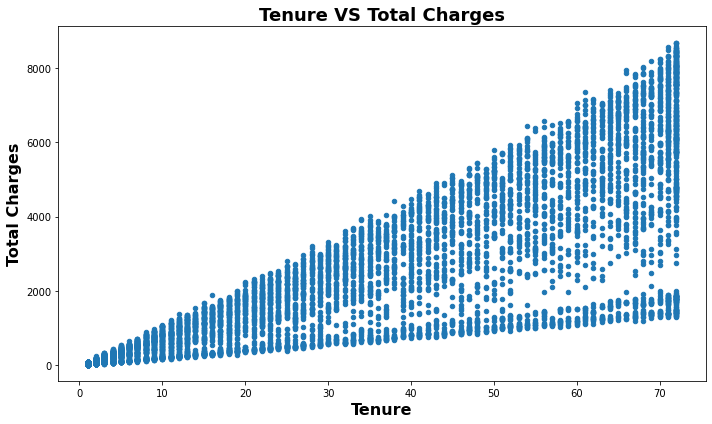

In [5]:
#Compare 'tenure' with 'Total Charges' 
customerdata['tenure'].dtype
customerdata['TotalCharges']=pd.to_numeric(customerdata['TotalCharges'],errors = 'coerce')
customerdata['TotalCharges'].dtype
customerdata.plot(x='tenure', y='TotalCharges', kind='scatter',figsize=(10,6))
plt.title('Tenure VS Total Charges', fontsize=18,fontweight="bold")
plt.xlabel('Tenure', fontsize=16,fontweight="bold")
plt.ylabel('Total Charges', fontsize=16,fontweight="bold")
plt.tight_layout()

In [8]:
#4 Find out which contract is prefered by senior citizen-Method 1
customerdata['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [9]:
#4 Find out which contract is prefered by senior citizen-Method 2
customerdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data2=customerdata.drop(['customerID', 'gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],axis=1)
data2

,SeniorCitizen,Contract
0,0,Month-to-month
1,0,One year
2,0,Month-to-month
3,0,One year
4,0,Month-to-month
...,...,...
7038,0,One year
7039,0,One year
7040,0,Month-to-month
7041,1,Month-to-month


Text(0.5, 1.0, 'SeniorCitizen and contract type')

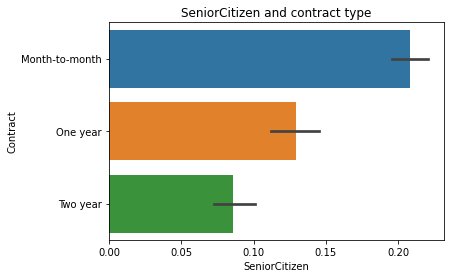

In [11]:
sns.barplot(x='SeniorCitizen',y='Contract',data=data2)
plt.title('SeniorCitizen and contract type')

So month-month contract is most prefered by senior ciizen

In [12]:
#Comment your findings on payment method
data3=customerdata.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges', 'Churn'],axis=1)
data3

,PaymentMethod
0,Electronic check
1,Mailed check
2,Mailed check
3,Bank transfer (automatic)
4,Electronic check
...,...
7038,Mailed check
7039,Credit card (automatic)
7040,Electronic check
7041,Mailed check


In [13]:
data3['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Electronic check is most prefered payment method followed by Mailed check,Bank transfer (automatic)and Credit card (automatic) respectively.